In [1]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path

data_path = 'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Datasets\\' 
saving_path = 'C:\\Users\\bianchg\\Documents\\GitHub\\Bianchini2025_SC\\Figures_output\\'

In [2]:
# load the CCG dataset

file = ''.join([data_path,'connectivity_dataset\\CCG_dataset_baseline.mat'])

CCG_dict = mat73.loadmat(file)
all_ccg = CCG_dict['all_ccg']

for k in all_ccg.keys():
    globals()[k] = all_ccg[k]
    
connection_strength = np.copy(peaks)

In [3]:
# function to calculate and plot the correlation probability for both pairs and stim pairs
def calculate_probability(pair_distance, over_tot, sig_indices, bin_width = 50, lag_sign=None):

    min_val = np.min(pair_distance)
    max_val = np.max(pair_distance)
    n_bins = int(np.round((max_val - min_val) / bin_width))

    idA, edges = makeBins_SC(pair_distance, n_bins)

    idB = idA[over_tot]
    if lag_sign is not None:
        sig_lag_sign = lag_sign[sig_indices]
        pairs_connected = sig_indices[sig_lag_sign != 0]
        idC = idA[pairs_connected]
    else:
        idC = idA[sig_indices]

    perc = []
    for b in range(1, n_bins + 1):
        tot = idB[idB == b].shape[0]
        sig = idC[idC == b].shape[0]
        if tot == 0:
            perc.append(float('nan'))
        elif sig == 0:
            perc.append(0)
        else:
            perc.append((sig / tot) * 100)

    return edges, perc, max_val

In [4]:
# assess probability of correlation and connection

min_FR = 10#10 #Hz
sig_idx = sig_idx_5sd # peak a SD

sig_indices = np.unique(np.concatenate([np.where((np.array(sig_idx) == 1) & (np.array(pre_modality) > 0) & (np.array(post_modality) > 0))[0],
                                        np.where((np.array(sig_idx) == 1) & (np.array(pre_mean_FR) > min_FR) & (np.array(post_mean_FR) > min_FR))[0]]))

over_tot = C = np.unique(np.concatenate([np.where((np.array(pre_modality) > 0) & (np.array(post_modality) > 0))[0],
                                             np.where((np.array(pre_mean_FR) > min_FR) & (np.array(post_mean_FR) > min_FR))[0]]))

sig_pairs = sig_indices[0::2]
tot_pairs = over_tot [0::2]

# define directionality
lag_sign = np.zeros(peak_lag.shape[0])
lag_sign[peak_lag>=10] = 1
lag_sign[peak_lag<=-10] = -1

sig_lag_sign = lag_sign[sig_indices]
pairs_connected = sig_indices[sig_lag_sign!=0]
pairs_simultanous = sig_indices[sig_lag_sign==0]

In [7]:
pairs_connected.shape,pairs_simultanous.shape,tot_pairs.shape[0]/2

((2842,), (2074,), (69044,))

In [22]:
all_count = sess_n[over_tot]
unique_values1, counts1 = np.unique(all_count, return_counts=True)

all_count2 = sess_n[pairs_connected]
unique_values2, counts2 = np.unique(all_count2, return_counts=True)

# Find the intersecting values
intersecting_values = np.intersect1d(unique_values1, unique_values2)

# Find the indices of these intersecting values in unique_values1
indices_in_unique_values1 = np.where(np.isin(unique_values1, intersecting_values))[0]

conn_prob_individual_rec = counts2/counts1[indices_in_unique_values1]*100

In [25]:
all_count = sess_n[over_tot]
unique_values1, counts1 = np.unique(all_count, return_counts=True)

all_count2 = sess_n[pairs_simultanous]
unique_values2, counts2 = np.unique(all_count2, return_counts=True)

# Find the intersecting values
intersecting_values = np.intersect1d(unique_values1, unique_values2)

# Find the indices of these intersecting values in unique_values1
indices_in_unique_values1 = np.where(np.isin(unique_values1, intersecting_values))[0]

conn_prob_individual_rec_simultaneous = counts2/counts1[indices_in_unique_values1]*100
np.mean(conn_prob_individual_rec_simultaneous)

1.827549965837265

In [5]:
# for figure one save and perc_pairs to see how connection percentage changes with distance

bin_width = 100
edges_pairs, perc_pairs, max_val = calculate_probability(pair_distance_depth, over_tot, sig_indices,bin_width = bin_width,lag_sign=lag_sign)

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_distance.npy'])
np.save(save_dir,perc_pairs) 


In [6]:
# calculate random connection probability 

file = ''.join([data_path,'connectivity_dataset\\CCG_dataset_baseline_shuffled.mat'])

CCG_dict_shuffled = mat73.loadmat(file)
all_ccg_shuffled = CCG_dict_shuffled['all_ccg']

for k in all_ccg_shuffled.keys():
    new_name = f"{k}_shuffled"
    globals()[new_name] = all_ccg_shuffled[k]

lag_sign_shuffled = np.zeros(peak_lag_shuffled.shape[0])
lag_sign_shuffled[peak_lag_shuffled>=10] = 1
lag_sign_shuffled[peak_lag_shuffled<=-10] = -1

# assess probability of correlation and connection

min_FR = 10#10 #Hz
sig_idx = sig_idx_5sd_shuffled # peak a SD

sig_indices_shuffled = np.unique(np.concatenate([np.where((np.array(sig_idx) == 1) & (np.array(pre_modality_shuffled) > 0) & (np.array(post_modality_shuffled) > 0))[0],
                                        np.where((np.array(sig_idx) == 1) & (np.array(pre_mean_FR_shuffled) > min_FR) & (np.array(post_mean_FR_shuffled) > min_FR))[0]]))

over_tot_shuffled = C = np.unique(np.concatenate([np.where((np.array(pre_modality_shuffled) > 0) & (np.array(post_modality_shuffled) > 0))[0],
                                             np.where((np.array(pre_mean_FR_shuffled) > min_FR) & (np.array(post_mean_FR_shuffled) > min_FR))[0]]))

sig_pairs_shuffled = sig_indices_shuffled[0::2]
tot_pairs_shuffled = over_tot_shuffled [0::2]

sig_lag_sign_shuffled = lag_sign_shuffled[sig_indices_shuffled]
pairs_connected_shuffled = sig_indices_shuffled[sig_lag_sign_shuffled!=0]

random_connection_probability = len(pairs_connected_shuffled)/len(over_tot_shuffled)*100

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\random_connection_probability.npy'])
np.save(save_dir,random_connection_probability) 


In [5]:
# load the main dataset
file= ''.join([data_path,'neurons_datasets\\delay_tuning_dataset.mat'])
data_dict = mat73.loadmat(file)
DAT=data_dict['merged_dataset']

# check keys available
print(DAT.keys())

# extract all keys
for k in DAT.keys():
    globals()[k] = DAT[k]

dict_keys(['AP_lim', 'ML_lim', 'all_boot_aud', 'all_boot_vis', 'animal_ID', 'binSize', 'coord3D', 'depth_lim', 'experiment_ID', 'modality', 'peaks', 'pvals', 'resp', 'spikes', 'trials', 'window_spikes'])


In [41]:
# connection percentage as a function of location along ML axis 

actual_lengthML = ML_lim[1] - ML_lim[0]
pair_meanML_pos2 = pair_meanML_pos - ML_lim[0]
max_val = actual_lengthML
min_val = 0 
new_pair_meanML_pos = np.array([max_val - val + min_val for val in pair_meanML_pos2])

all_perc_conn,all_ML=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_connected,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    ML_loc = np.nanmean(new_pair_meanML_pos[this_s])
    all_ML.append(ML_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_ML.npz'])
np.savez(save_dir, all_ML=all_ML, all_perc_conn=all_perc_conn, actual_lengthML=actual_lengthML)

# connection percentage as a function of location along ML axis 

actual_lengthML = ML_lim[1] - ML_lim[0]
pair_meanML_pos2 = pair_meanML_pos - ML_lim[0]
max_val = actual_lengthML
min_val = 0 
new_pair_meanML_pos = np.array([max_val - val + min_val for val in pair_meanML_pos2])

all_perc_conn,all_ML=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_simultanous,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    ML_loc = np.nanmean(new_pair_meanML_pos[this_s])
    all_ML.append(ML_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_ML_zerolag.npz'])
np.savez(save_dir, all_ML=all_ML, all_perc_conn=all_perc_conn, actual_lengthML=actual_lengthML)

In [40]:
# connection percentage as a function of location along ML axis 

actual_lengthAP = AP_lim[1] - AP_lim[0]
new_pair_meanAP_pos = pair_meanAP_pos - AP_lim[0]

all_perc_conn,all_AP=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_connected,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    AP_loc = np.nanmean(new_pair_meanAP_pos[this_s])
    all_AP.append(AP_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_AP.npz'])
np.savez(save_dir, all_AP=all_AP, all_perc_conn=all_perc_conn, actual_lengthAP=actual_lengthAP)

# connection percentage as a function of location along ML axis 

actual_lengthAP = AP_lim[1] - AP_lim[0]
new_pair_meanAP_pos = pair_meanAP_pos - AP_lim[0]

all_perc_conn,all_AP=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_simultanous,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    AP_loc = np.nanmean(new_pair_meanAP_pos[this_s])
    all_AP.append(AP_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_AP_zerolag.npz'])
np.savez(save_dir, all_AP=all_AP, all_perc_conn=all_perc_conn, actual_lengthAP=actual_lengthAP)


nan


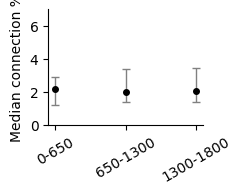

In [38]:
# Prepare data (same as before)
all_AP = np.array(all_AP)
all_perc = np.array(all_perc_conn)

all_AP2 = all_AP[~np.isnan(all_AP)]
all_perc2 = all_perc[~np.isnan(all_AP)]

all_AP3 = np.append(all_AP2, [0, actual_lengthAP])
all_perc3 = np.append(all_perc2, [np.nan, np.nan])

bin_edges_AP = np.array([0, 650, 1300, 1800, 2300])
bin_labels = ['0-650', '650-1300', '1300-1800', '1950-2600']
ids_AP = np.digitize(all_AP3, bin_edges_AP) - 1
ids_AP = ids_AP[:-2]
all_perc3 = all_perc3[:-2]

medians = []
lower_errors = []
upper_errors = []
valid_x = []  # keep track of bins that have data

for i in range(len(bin_labels)):
    group = all_perc3[ids_AP == i]
    group = group[~np.isnan(group)]
    
    if len(group) == 0:
        continue  # skip this bin if no valid data
    
    q1 = np.percentile(group, 25)
    q3 = np.percentile(group, 75)
    med = np.median(group)
    
    medians.append(med)
    lower_errors.append(med - q1)
    upper_errors.append(q3 - med)
    valid_x.append(i)

fig, ax = plt.subplots(figsize=(2, 1.5))

ax.errorbar(valid_x, medians, yerr=[lower_errors, upper_errors], fmt='o', color='k',
            ecolor='gray', capsize=3, elinewidth=1, markersize=4)

ax.set_xticks(valid_x)
ax.set_xticklabels([bin_labels[i] for i in valid_x], rotation=30)
ax.set_ylabel('Median connection %')
ax.set_ylim([0, 7])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optional: Kruskal-Wallis test
all_groups = [all_perc3[ids_AP == i] for i in range(len(bin_labels))]
u_statistic, u_pvalue = kruskal_test(*all_groups)
print(u_pvalue)


0.8155956027723867


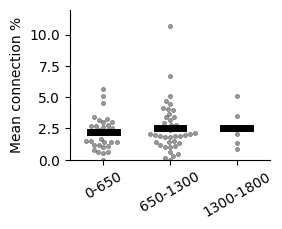

In [39]:
# exclude nans
all_AP = np.array(all_AP)
all_perc = np.array(all_perc_conn)

all_AP2 =  all_AP[~np.isnan(all_AP)]
all_AP3 = np.append(all_AP2, [0, actual_lengthAP])
all_perc2 = all_perc[~np.isnan(all_AP)]

bin_edges_AP = np.array([0, 650, 1300, 1800, 2300])
ids_AP = np.digitize(all_AP3, bin_edges_AP)-1
ids_AP = ids_AP[:-2]

fig, this_ax = plt.subplots(1,1, figsize=(2,1.5)) # this is half of an A4 page
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)
meanLineWidth = 0.2
n_bins = 5
all_groups = []  # To store `curr_scores` for each bin
for i in range(np.unique(ids_AP).shape[0]):
    
    curr_scores = all_perc2[ids_AP==i]
    med = np.nanmean(curr_scores)
    this_ax.plot([- meanLineWidth+i, meanLineWidth+i], [med,med],linewidth = 5,c = 'k',zorder =1)       

    sns.swarmplot(x=i, y=curr_scores, ax=this_ax, size=3, facecolors = 'k',edgecolor='k',alpha = 0.4, linewidth=0.5, zorder=2)
    #print(med)
    all_groups.append(curr_scores)

this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

this_ax.set_ylim([0,12])
this_ax.set_ylabel('Mean connection %')

this_ax.set_xticklabels(['0-650','650-1300','1300-1800','1950-2600'],rotation=30)

u_statistic, u_pvalue = kruskal_test(*all_groups)
print(u_pvalue)

Kruskal-Wallis p-value: 0.0010
nan


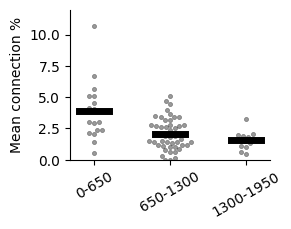

In [100]:
# exclude nans
all_ML = np.array(all_ML)
all_perc = np.array(all_perc_conn)

all_ML2 =  all_ML[~np.isnan(all_ML)]
all_ML3 = np.append(all_ML2, [0, actual_lengthML])
all_perc2 = all_perc[~np.isnan(all_ML)]

bin_edges_ML = np.array([0, 650, 1300, 1950, 2600])
ids_ML = np.digitize(all_ML3, bin_edges_ML)-1
ids_ML = ids_ML[:-2]

fig, this_ax = plt.subplots(1,1, figsize=(2,1.5)) # this is half of an A4 page
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)
meanLineWidth = 0.2

all_groups = []  # To store `curr_scores` for each bin
for i in range(n_bins-1):
    
    curr_scores = all_perc2[ids_ML==i]
    med = np.nanmean(curr_scores)
    this_ax.plot([- meanLineWidth+i, meanLineWidth+i], [med,med],linewidth = 5,c = 'k',zorder =1)       

    sns.swarmplot(x=i, y=curr_scores, ax=this_ax, size=3, facecolors = 'k',edgecolor='k',alpha = 0.4, linewidth=0.5, zorder=2)
    #print(med)
    all_groups.append(curr_scores)

this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

this_ax.set_ylim([0,12])
this_ax.set_ylabel('Mean connection %')

this_ax.set_xticklabels(['0-650','650-1300','1300-1950','1950-2600'],rotation=30)


valid_groups = [g for g in all_groups if len(g) > 0]

if len(valid_groups) > 1:
    u_statistic, u_pvalue = kruskal_test(*valid_groups)
    print(f"Kruskal-Wallis p-value: {u_pvalue:.4f}")
          
u_statistic, u_pvalue = kruskal_test(*all_groups)
print(u_pvalue)

In [103]:
# save AP and ML position as well as connection proabability for LMM
count_n = []
all_perc = []
all_ML =[]
all_AP = []
for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_simultanous,this_s).shape[0]

    perc=((how_many_sig/how_many_tot)*100) 
    
    ML_loc = np.nanmean(new_pair_meanML_pos[this_s])
    AP_loc = np.nanmean(pair_meanAP_pos[this_s])

    all_perc.append(perc)
    all_ML.append(ML_loc)
    all_AP.append(AP_loc)
    
    unique_pre = np.unique(pre_id[this_s])
    unique_post = np.unique(post_id[this_s])

    # Find intersection
    intersection = np.unique(np.intersect1d(unique_pre, unique_post))
    count_n.append(intersection.shape[0])
    
all_perc = np.array(all_perc)
all_ML = np.array(all_ML)
all_AP = np.array(all_AP)
count_n = np.array(count_n)

data = {'mean_connectivity': all_perc.flatten(),
        'ML': all_ML.flatten(),
        'AP': all_AP.flatten(),
        'n_neurons' : count_n.flatten()}
df = pd.DataFrame(data)
# Saving DataFrame to a CSV file
df.to_csv('connectivity_individual_recordings_zerolag.csv', index=False) 

print('saved')

saved


In [97]:
# connection percentage as a function of location along ML axis 

actual_lengthML = ML_lim[1] - ML_lim[0]
pair_meanML_pos2 = pair_meanML_pos - ML_lim[0]
max_val = actual_lengthML
min_val = 0 
new_pair_meanML_pos = np.array([max_val - val + min_val for val in pair_meanML_pos2])

all_perc_conn,all_ML=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_simultanous,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    ML_loc = np.nanmean(new_pair_meanML_pos[this_s])
    all_ML.append(ML_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_ML_lagzero.npz'])
np.savez(save_dir, all_ML=all_ML, all_perc_conn=all_perc_conn, actual_lengthML=actual_lengthML)

In [92]:


# connection percentage as a function of location along ML axis 

actual_lengthAP = AP_lim[1] - AP_lim[0]
new_pair_meanAP_pos = pair_meanAP_pos - AP_lim[0]

all_perc_conn,all_AP=[],[]

for s in np.unique(sess_n):
    this_s = np.where(sess_n==s)[0]
    this_s = this_s[0::2]

    how_many_tot = np.intersect1d(over_tot,this_s).shape[0]
    how_many_sig = np.intersect1d(pairs_simultanous,this_s).shape[0]
    perc=((how_many_sig/how_many_tot)*100) 
    all_perc_conn.append(perc)
    
    AP_loc = np.nanmean(new_pair_meanAP_pos[this_s])
    all_AP.append(AP_loc)
    
# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_AP_lagzero.npz'])
np.savez(save_dir, all_AP=all_AP, all_perc_conn=all_perc_conn, actual_lengthAP=actual_lengthAP)

In [41]:
# save distribution of peak efficacy

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\conn_strenght_dist.npy'])
np.save(save_dir,connection_strength[sig_indices]) 


In [43]:
# let's find delay neurons 

sig_del = []
which_tr = []
for i in range(peaks.shape[0]):
    y = peaks[i,:-2]

    vis_FR = peaks[i,-2]
    aud_FR = peaks[i,-1]

    if vis_FR>aud_FR:
        boot_out = all_boot_vis[i,:]
    elif aud_FR>vis_FR:
        boot_out = all_boot_aud[i,:]
    
    pos_sig = np.argwhere(boot_out>0)
    
    if len(pos_sig)>0:
        sig_del.append(i)
        tr = pos_sig[np.argmax(y[pos_sig])]
        which_tr.append(tr) 

sig_del = np.array(sig_del)
pref_delay=np.array(which_tr)[:,0]

# define the four modalitties: vis, aud, delay and multisensory not delay tuned

pair_boot_out = np.zeros((len(pre_id),2))

for i in sig_del:
    pair_boot_out[np.where(pre_id==i+1),0] = 1
    pair_boot_out[np.where(post_id==i+1),1] = 1

# these are the pairs that have a significant peak delay
sig_del_pairs = np.argwhere(np.sum(pair_boot_out,axis=1)==2)

# 2- get the preferred delay of these neurons
pair_pref_delay = np.nan*np.zeros((len(pre_id),2))

count = 0
for i in sig_del:
    pair_pref_delay[np.where(pre_id==i+1),0] = pref_delay[count]
    pair_pref_delay[np.where(post_id==i+1),1] = pref_delay[count]
    count+=1

# for now just divide between before 50ms and after 50 ms
sig_del_pairs_simplified = np.copy(pair_pref_delay)
sig_del_pairs_simplified[np.where(sig_del_pairs_simplified<=5)] = 1
sig_del_pairs_simplified[np.where(sig_del_pairs_simplified>=5)] = 1

# create a matrix with the modalities of the pairs + a different modality if the pair is delay preferring
pair_mod_delay = np.copy(pair_modality)
pair_mod_delay[pair_mod_delay==5] = 1
pair_mod_delay[pair_mod_delay==6] = 2

pair_mod_delay[pair_mod_delay>=3] = 4
pair_mod_delay[np.where(sig_del_pairs_simplified==1)] = 3
pair_mod_delay[np.where(sig_del_pairs_simplified==2)] = 3


In [44]:
# store the connectivity and directionality matrix 

combinations = []
n_modalities = 4

how_many_bins = 1
bin_width =2000


var1,var2, var3, var4, var5, var6 = pair_distance_depth, pair_modality, pair_mod_delay, over_tot, sig_indices, lag_sign 

min_val = np.min(var1) #min distance
max_val = np.max(var1) # max distance
n_bins = int(np.round((max_val - min_val) / bin_width))

idA, edges = makeBins_SC(var1, n_bins)
# Generate all combinations of modalities including cases where both modalities are the same
for i in range(1, n_modalities + 1):
    for j in range(1, n_modalities + 1):
        combinations.append([i, j])
# Convert the list of combinations to a NumPy array
cases = np.array(combinations)

perc_conn = np.nan*np.zeros((n_modalities,n_modalities))
real_number_conn = np.nan*np.zeros((n_modalities,n_modalities,how_many_bins))
tot_number_conn = np.nan*np.zeros((n_modalities,n_modalities,how_many_bins))
dir_score = np.nan*np.zeros((n_modalities,n_modalities))
conn_st_mean = np.nan*np.zeros((n_modalities,n_modalities,how_many_bins))
conn_st_median = np.nan*np.zeros((n_modalities,n_modalities,how_many_bins))

for i in range(cases.shape[0]):

    n_to_n = np.where((var3[:,0] == cases[i,0]) & (var3[:,1] == cases[i,1]))[0]

    if cases[i,0] == cases[i,1]: # if it's reciprocal, keep only one
        n_to_n = n_to_n[0::2]
    
    these_ids = np.intersect1d(var4,n_to_n) #these are the pairs that are in this modality
    sig_these_ids = np.intersect1d(var5,these_ids) #these are the pairs that are significant in this modality

    # what are the lags in these pairs?
    these_lags = var6[sig_these_ids]

    for b in range(how_many_bins):

        tot_bin = np.argwhere((idA[these_ids] == b+1)) #which connections are in this bin?
        these_mod_bin = np.argwhere((idA[sig_these_ids] == b+1))
        these_lag_bin = these_lags[idA[sig_these_ids] == b+1]

        if cases[i,0] == cases[i,1]: # if it's reciprocal
            this_lags = np.argwhere(these_lag_bin !=0)
            neg_lag = np.argwhere(these_lag_bin !=0)
        else:
            this_lags = np.argwhere(these_lag_bin <0)
            neg_lag = np.argwhere(these_lag_bin >0)

        if tot_bin.shape[0] != 0:          
            perc_conn[cases[i,0]-1,cases[i,1]-1] = this_lags.shape[0]/tot_bin.shape[0]*100

        real_number_conn[cases[i,0]-1,cases[i,1]-1,b] = this_lags.shape[0]    
        tot_number_conn[cases[i,0]-1,cases[i,1]-1,b] = tot_bin.shape[0]
        
        conn_st_median[cases[i,0]-1,cases[i,1]-1,b] = np.nanmedian(connection_strength[sig_these_ids])
        conn_st_mean[cases[i,0]-1,cases[i,1]-1,b] = np.nanmean(connection_strength[sig_these_ids])
        
        if cases[i,0] < cases[i,1]:
            if this_lags.shape[0] + neg_lag.shape[0] == 0:
                dir_score[cases[i,0]-1,cases[i,1]-1] = math.nan
            else:
                dir_score[cases[i,0]-1,cases[i,1]-1] = (this_lags.shape[0] - neg_lag.shape[0]) / (this_lags.shape[0] + neg_lag.shape[0])
                
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix.npy'])
np.save(save_dir,perc_conn)

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\directionality_score_matrix.npy'])
np.save(save_dir,dir_score)


In [45]:
how_many_bins = 1
# all cases wanted 
cases_arrays = [ 
                np.array([[1,1],[2,1],[3,1],[4,1]]), # to visual  
                np.array([[1,2],[2,2],[3,2],[4,2]]), # to auditory] 
                np.array([[1,3],[2,3],[3,3],[4,3]]), # to delay
                np.array([[1,4],[2,4],[3,4],[4,4]])]# to multi no delay
                
                
cases_arrays_inputs = np.copy(cases_arrays)

# Initialize an empty list to store the results for each case
conn_results = np.zeros((len(cases_arrays),len(cases_arrays[0])))
conn_strength = np.zeros((len(cases_arrays),len(cases_arrays[0])))
count = 0
for cases in cases_arrays_inputs:

    for i in range(cases.shape[0]):
        
        n_to_n = np.where((pair_mod_delay[:,0] == cases[i,0]) & (pair_mod_delay[:,1] == cases[i,1]))[0]

        if cases[i,0] == cases[i,1]: # if it's reciprocal, keep only one
            n_to_n = n_to_n[0::2]
        
        these_ids = np.intersect1d(over_tot,n_to_n) #these are the pairs that are in this modality
        sig_these_ids = np.intersect1d(sig_indices,these_ids) #these are the pairs that are significant in this modality
        
        # what are the lags in these pairs?
        these_lags = lag_sign[sig_these_ids]
        
        for b in range(how_many_bins):

            tot_bin = np.argwhere((idA[these_ids] == b+1)) #which connections are in this bin?
            these_mod_bin = np.argwhere((idA[sig_these_ids] == b+1))
            these_lag_bin = these_lags[idA[sig_these_ids] == b+1]

            if cases[i,0] == cases[i,1]: # if it's reciprocal
                this_lags = np.argwhere(these_lag_bin !=0)
            else:
                this_lags = np.argwhere(these_lag_bin <0)


            conn_results[count,i] = this_lags.shape[0]
            good_pos = sig_these_ids[this_lags]
            conn_strength[count,i] = np.nansum(connection_strength[good_pos])

    count += 1

# now let's make this into percentages
results_strength_input = [] # median connection strength
for i in range(conn_results.shape[1]):

    results_strength_input.append(conn_strength[:,i]/np.nansum(conn_strength,axis=1)*100)

results_strength_input = np.array(results_strength_input)
results_strength_input[np.isnan(results_strength_input)] = 0

# same for the outputs

cases_arrays_outputs =  [np.fliplr(array) for array in cases_arrays]

# Initialize an empty list to store the results for each case
conn_results = np.zeros((len(cases_arrays),len(cases_arrays[0])))
conn_strength = np.zeros((len(cases_arrays),len(cases_arrays[0])))
count = 0
for cases in cases_arrays_outputs:

    for i in range(cases.shape[0]):
        
        n_to_n = np.where((pair_mod_delay[:,0] == cases[i,0]) & (pair_mod_delay[:,1] == cases[i,1]))[0]

        if cases[i,0] == cases[i,1]: # if it's reciprocal, keep only one
            n_to_n = n_to_n[0::2]
        
        these_ids = np.intersect1d(over_tot,n_to_n) #these are the pairs that are in this modality
        sig_these_ids = np.intersect1d(sig_indices,these_ids) #these are the pairs that are significant in this modality
        
        # what are the lags in these pairs?
        these_lags = lag_sign[sig_these_ids]
        
        for b in range(how_many_bins):

            tot_bin = np.argwhere((idA[these_ids] == b+1)) #which connections are in this bin?
            these_mod_bin = np.argwhere((idA[sig_these_ids] == b+1))
            these_lag_bin = these_lags[idA[sig_these_ids] == b+1]

            if cases[i,0] == cases[i,1]: # if it's reciprocal
                this_lags = np.argwhere(these_lag_bin !=0)
            else:
                this_lags = np.argwhere(these_lag_bin <0)


            conn_results[count,i] = this_lags.shape[0]
            good_pos = sig_these_ids[this_lags]
            conn_strength[count,i] = np.nansum(connection_strength[good_pos])

    count += 1

# now let's make this into percentages
results_strength_output = [] # median connection strength
for i in range(conn_results.shape[1]):

    results_strength_output.append(conn_strength[:,i]/np.nansum(conn_strength,axis=1)*100)

results_strength_output = np.array(results_strength_output)
results_strength_output[np.isnan(results_strength_output)] = 0

# Save the arrays in a compressed .npz file
save_dir = ''.join([data_path,'connectivity_dataset\\conn_strength_IN_OUT.npz'])
np.savez(save_dir, results_strength_input=results_strength_input, results_strength_output=results_strength_output)


In [69]:
# get mean locations for each neuron type 

depth_norm2 =  ((coord3D[:,1] -depth_lim[0]) / (depth_lim[1] - depth_lim[0]))
depth = []
for i in range(1,5):
    mean_depth = np.nanmean(depth_norm2[pre_id[np.argwhere(pair_mod_delay[:,0]==i)].astype(int)])    
    depth.append(mean_depth)

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\mean_loc_subgroups.npy'])
np.save(save_dir,depth)

In [70]:
# save mean FR during baseline for the same neurons

n_modalities = 4

all_data = []
all_labels = []
medians = []
data_by_modality = []
iqrs=[]
for i in range(1, n_modalities+1):
    FR_baseline = np.unique(pre_mean_FR[pair_mod_delay[:, 0] == i])
    all_data.extend(FR_baseline)
    all_labels.extend([i] * len(FR_baseline))
    medians.append(np.median(FR_baseline))
    q75, q25 = np.percentile(FR_baseline, [75 ,25])
    iqrs.append(q75 - q25)
    data_by_modality.append(FR_baseline)



In [71]:
# let's calculate an overall connection probability
var1,var2, var3, var4, var5, var6 = pair_distance_depth, pair_modality, pair_mod_delay, over_tot, sig_indices, lag_sign 

n_modalities = 4
perc_conn = np.zeros((n_modalities,1))
# Generate all combinations of modalities including cases where both modalities are the same
for i in range(1, n_modalities + 1):

    n_to_n = np.where((var3[:,0] == i))[0]
    mutual_cases = np.argwhere(var3[n_to_n][:,1]==i)[0::2]
    n_to_n_final = np.setdiff1d(n_to_n,mutual_cases)
    
    these_ids = np.intersect1d(var4,n_to_n_final) #these are the pairs that are in this modality
    sig_these_ids = np.intersect1d(var5,these_ids) #these are the pairs that are significant in this modality
    
    # what are the lags in these pairs?
    these_lags = var6[sig_these_ids]
    conn_n = np.argwhere(these_lags!=0).shape[0]
    tot_conn = these_ids.shape[0]
    perc_conn[i-1] = (conn_n/tot_conn)*100
    
    
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\FR_subgroups.npz'])
np.savez(save_dir, all_labels=all_labels, all_data=all_data, medians=medians,perc_conn=perc_conn)


In [59]:
# difference in connection percentage between medial and lateral SC

# Define key variables
var1, var3, var4, var5, var6 = pair_distance_depth, pair_mod_delay, over_tot, sig_indices, lag_sign  
n_modalities = 4

# Normalize coordinates  
good_pos = ~np.isnan(coord3D[:, 0])  # Filter valid positions
AP_norm = coord3D[good_pos, 0] - AP_lim[0]
ML_norm = actual_lengthML - (coord3D[good_pos, 2] - ML_lim[0])  # Flip ML coordinates
experiment_IDs = experiment_ID[good_pos]

# Create bins
actual_lengthML = ML_lim[1] - ML_lim[0]
actual_lengthAP = AP_lim[1] - AP_lim[0]
id_AP, edges_AP = makeBins_SC(np.append(AP_norm, [0, actual_lengthAP]), 2)
id_ML, edges_ML = makeBins_SC(np.append(ML_norm, [0, actual_lengthML]), 2)
id_AP, id_ML = id_AP[:-2], id_ML[:-2]  

# Distance binning
n_bins = int(np.round((np.max(var1) - np.min(var1)) / 2000))  
idA, edges = makeBins_SC(var1, n_bins)

# Compute connection percentages
perc_conn = np.full((2, n_modalities, n_modalities, 1), np.nan)
count = 0

for bin in np.unique(id_ML):  
    sessions = np.unique(experiment_IDs[id_ML == bin])

    # Generate modality combinations
    cases = np.array([[i, j] for i in range(1, n_modalities + 1) for j in range(1, n_modalities + 1)])

    for i in range(cases.shape[0]):
        n_to_n = np.where((var3[:, 0] == cases[i, 0]) & (var3[:, 1] == cases[i, 1]))[0]
        if cases[i, 0] == cases[i, 1]:  
            n_to_n = n_to_n[0::2]  

        # Filter connections by session
        session_mask = np.isin(sess_n, sessions)
        n_to_n = n_to_n[session_mask[n_to_n]]
        over_tot_filtered = var4[session_mask[var4]]

        these_ids = np.intersect1d(over_tot_filtered, n_to_n)
        sig_these_ids = np.intersect1d(var5, these_ids)

        these_lags = var6[sig_these_ids]

        for b in range(1):  # Single bin case
            tot_bin = np.argwhere(idA[these_ids] == b + 1)
            these_lag_bin = these_lags[idA[sig_these_ids] == b + 1]

            if cases[i, 0] == cases[i, 1]:  
                this_lags = np.argwhere(these_lag_bin == 0)
            else:
                this_lags = np.argwhere(these_lag_bin == 0)

            if tot_bin.shape[0] != 0:
                perc_conn[count, cases[i, 0] - 1, cases[i, 1] - 1, b] = this_lags.shape[0] / tot_bin.shape[0] * 100

    count += 1
    
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix_MminumsL_zeroCCG.npy'])
np.save(save_dir,perc_conn)

In [106]:
# difference in connection percentage between medial and lateral SC

# Define key variables
var1, var3, var4, var5, var6 = pair_distance_depth, pair_mod_delay, over_tot, sig_indices, lag_sign  
n_modalities = 4

# Normalize coordinates  
good_pos = ~np.isnan(coord3D[:, 0])  # Filter valid positions
AP_norm = coord3D[good_pos, 0] - AP_lim[0]
ML_norm = actual_lengthML - (coord3D[good_pos, 2] - ML_lim[0])  # Flip ML coordinates
experiment_IDs = experiment_ID[good_pos]

# Create bins
id_AP, edges_AP = makeBins_SC(np.append(AP_norm, [0, actual_lengthAP]), 2)
id_ML, edges_ML = makeBins_SC(np.append(ML_norm, [0, actual_lengthML]), 2)
id_AP, id_ML = id_AP[:-2], id_ML[:-2]  

# Distance binning
n_bins = int(np.round((np.max(var1) - np.min(var1)) / 2000))  
idA, edges = makeBins_SC(var1, n_bins)

# Compute connection percentages
perc_conn = np.full((2, n_modalities, n_modalities, 1), np.nan)
count = 0

for bin in np.unique(id_ML):  
    sessions = np.unique(experiment_IDs[id_ML == bin])

    # Generate modality combinations
    cases = np.array([[i, j] for i in range(1, n_modalities + 1) for j in range(1, n_modalities + 1)])

    for i in range(cases.shape[0]):
        n_to_n = np.where((var3[:, 0] == cases[i, 0]) & (var3[:, 1] == cases[i, 1]))[0]
        if cases[i, 0] == cases[i, 1]:  
            n_to_n = n_to_n[0::2]  

        # Filter connections by session
        session_mask = np.isin(sess_n, sessions)
        n_to_n = n_to_n[session_mask[n_to_n]]
        over_tot_filtered = var4[session_mask[var4]]

        these_ids = np.intersect1d(over_tot_filtered, n_to_n)
        sig_these_ids = np.intersect1d(var5, these_ids)

        these_lags = var6[sig_these_ids]

        for b in range(1):  # Single bin case
            tot_bin = np.argwhere(idA[these_ids] == b + 1)
            these_lag_bin = these_lags[idA[sig_these_ids] == b + 1]

            if cases[i, 0] == cases[i, 1]:  
                this_lags = np.argwhere(these_lag_bin != 0)
            else:
                this_lags = np.argwhere(these_lag_bin < 0)

            if tot_bin.shape[0] != 0:
                perc_conn[count, cases[i, 0] - 1, cases[i, 1] - 1, b] = this_lags.shape[0] / tot_bin.shape[0] * 100

    count += 1
    
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix_MminumsL.npy'])
np.save(save_dir,perc_conn)


In [124]:
# which delay prefering neurons are connected to which?  - save the confusion matrix

n_modalities = 4
# Initialize an empty list to store the combinations
combinations = []
# Generate all combinations of modalities including cases where both modalities are the same
for i in range(1, n_modalities + 1):
    for j in range(1, n_modalities + 1):
        combinations.append([i, j])
# Convert the list of combinations to a NumPy array
cases =np.array(combinations)

all_pre = []
all_post = []
count = 0
for i in range(cases.shape[0]):
    
    if cases[i,0] == 3 and cases[i,1] ==3: # if it's a delay pair  
        n_to_n = np.where((pair_mod_delay[:,0] == cases[i,0]) & (pair_mod_delay[:,1] == cases[i,1]))[0]

        these_ids = np.intersect1d(over_tot,n_to_n) #these are the pairs that are in this modality
        sig_these_ids = np.intersect1d(sig_indices,these_ids) #these are the pairs that are significant in this modality

        # what are the lags in these pairs?
        these_lags = lag_sign[sig_these_ids]
        
        for b in range(how_many_bins):
            
            tot_bin = np.argwhere((idA[these_ids] == b+1)) #which connections are in this bin?
            these_mod_bin = np.argwhere((idA[sig_these_ids] == b+1))
            these_lag_bin = these_lags[idA[sig_these_ids] == b+1]
            
            lags_loc = sig_these_ids[np.argwhere(these_lag_bin <0)]

            #check the preferred delay at this location
            pair_pref_delay # this is the preferred delay for every neurons pair
            pref_del_pre = pair_pref_delay[lags_loc,0]
            pref_del_post = pair_pref_delay[lags_loc,1]

            all_pre.append(pref_del_pre)
            all_post.append(pref_del_post)

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'connectivity_dataset\\preferred_delay_connectivity.npz'])
np.savez(save_dir, all_pre=all_pre, all_post=all_post)
